## AS1.1 - Model-based prediction & control - theorievragen
In dit notebook zet ik mijn gevonden antwoorden voor opdracht 1.1 van het vak Adaptive Systems

### A. Markov Chain
In deze opdracht teken ik een Markov Chain op basis van de volgende state transition probability matrix <S, P> met S = states en P = probabilities. Er is geen specifieke begin state, maar er is wel een specifieke end state. Deze zal ik moeten vinden en visueel duidelijk maken welke dit is.

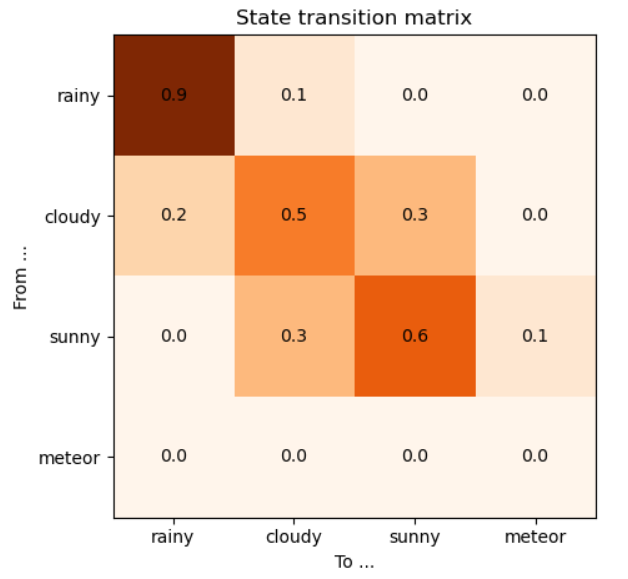

Als ik al deze waardes in een chain zet ziet de afbeelding er ongeveer zo uit:

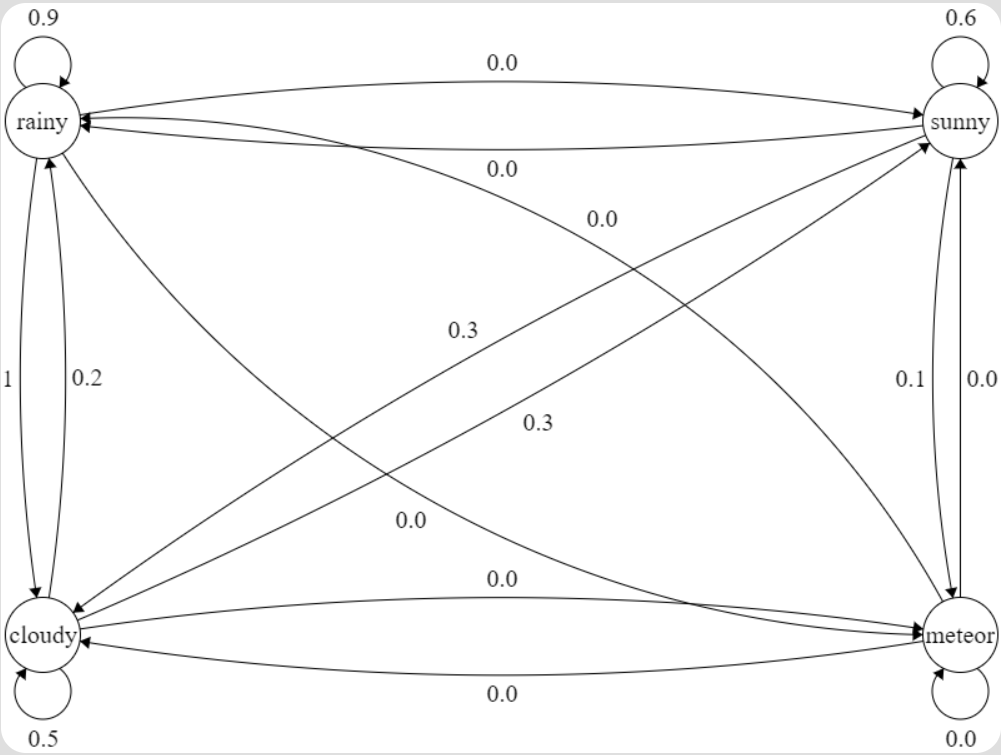
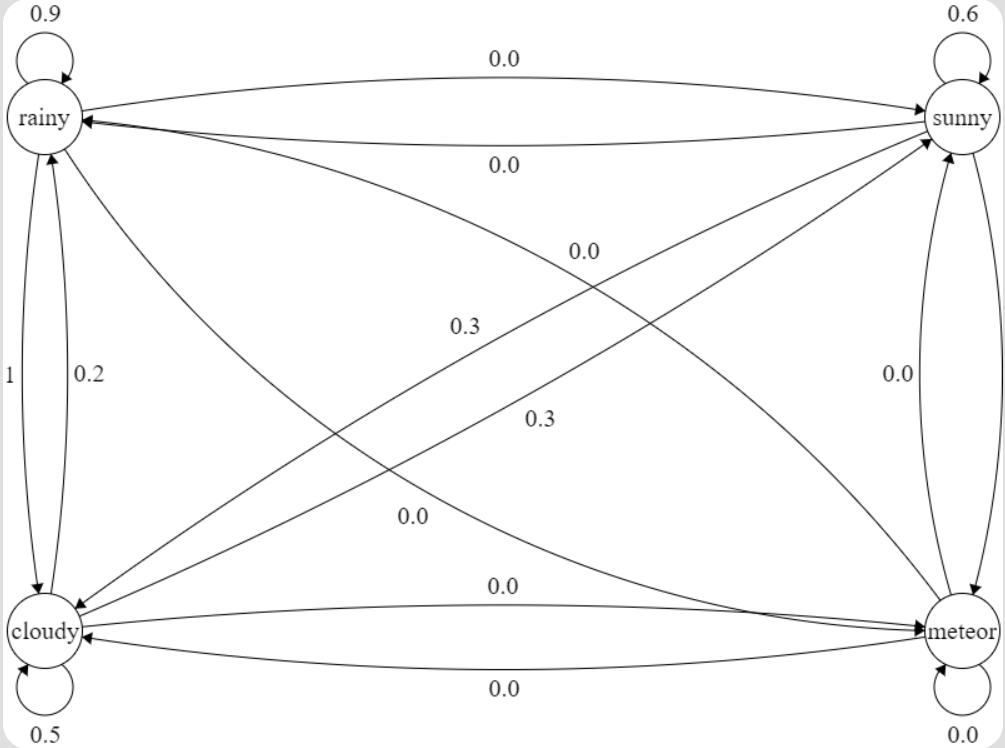
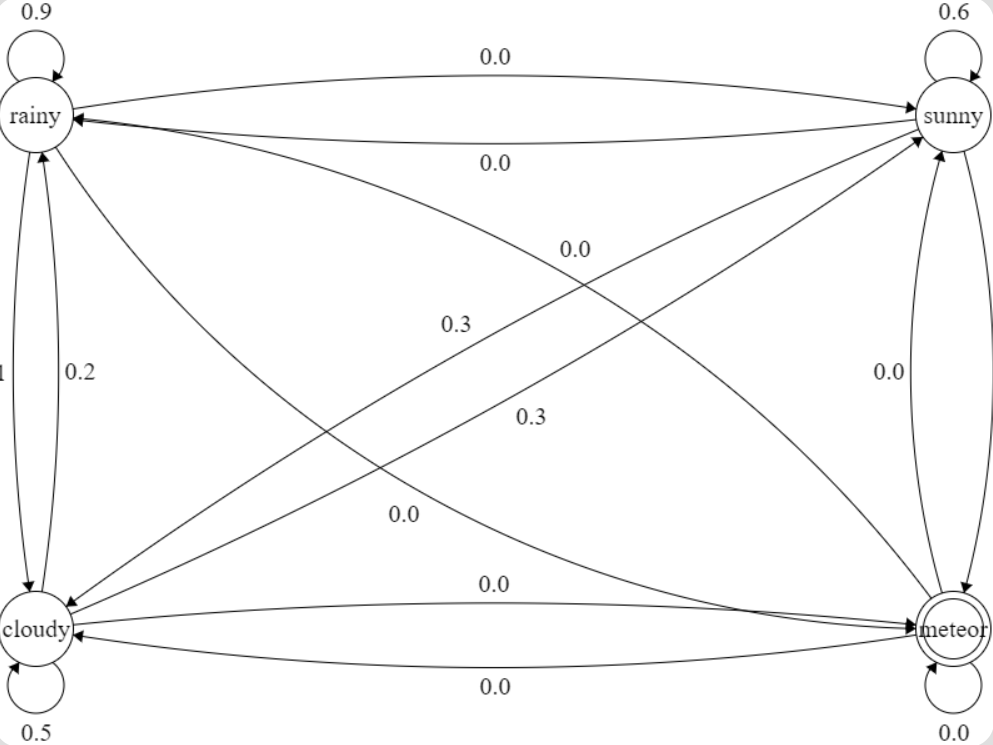

Dit vind ik zelf erg onoverzichtelijk, dit los ik op door alle 0.0 pijlen weg te halen

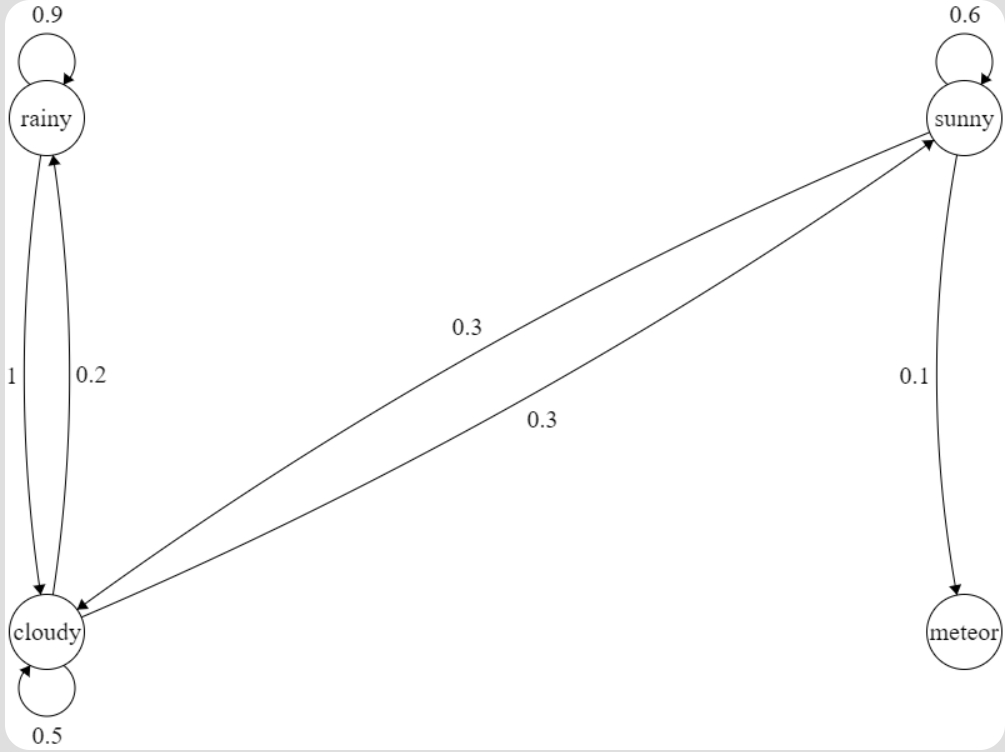

Dit kan ook iets mooier neergezet worden:

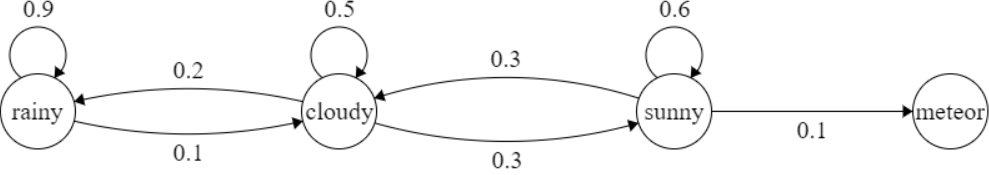

Hier valt ook duidelijk te zien dat "meteor" de end state is, er gaat namelijk geen enkele pijl vanuit meteor naar een andere state. Dit viel ook al te zien in de matrix aangezien de kans dat je naar een andere state kan gaan vanuit de "meteor" state voor alle states 0.0 is 

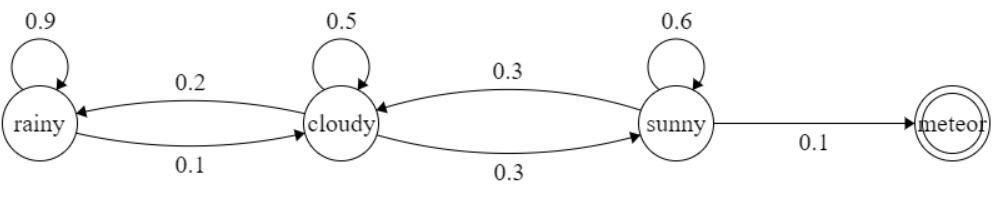

### B. Markov Reward Process
In deze opdracht wil ik van de bovenstaande Markov Proces(Markov Chain) een Markov Reward Proces maken. Hiervoor voeg ik alle rewards toe aan de tekening.

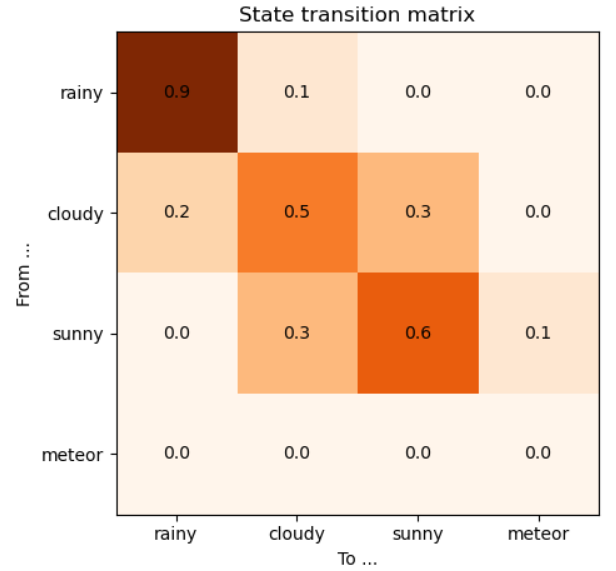

De states (van links naar rechts) hebben respectievelijk rewards -2, 0, 3 en -10. \
Dit kan je opvatten als "Wanneer je naar de state sunny toe gaan, geeft dit altijd een reward van 3, waar je ook vandaan komt." \
In de volgende afbeelding zet ik deze rewards(R) naast de probabilities(P) uit de vorige opdracht.

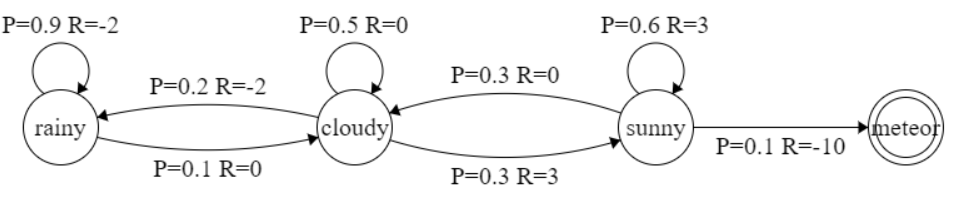

### C. Sampling
In deze opdracht pak ik twee mogelijke samples van de MRP uit opgave B en leg ik uit wat de return G<sub>t</sub> is voor deze samples

Een sample is een reeks transities vanaf een willekeurig gekozen begin state tot de end state. Dus je begint in state s en loopt vervolgens een mogelijk pad door het MRP tot de end state.\
Return G geeft de gesommeerde gedisconteerde rewards; de formule voor G is als volgt:\
\
$ G_{t}  = \sum_{k=0}^{\infty} \gamma^{k}R_{t+k+1}$\
\
R is de reward die je krijgt in een state, het kleine cijfer erachter is de stap in de tijd\
k is het aantal stappen dat is genomen\
$ \gamma $ is een parameter voor de "discount factor", deze pebaalt hoe waardevol de toekomstige rewards (R) zijn op het huidige moment. \
We beginnen voor het gemak met $ \gamma $ = 1 \
Aangezien elke macht van 1 een uitkomst heeft van 1 kunnen we deze voor dit voorbeeld uit de formule weglaten:\
\
$ G_{t}  = \sum_{k=0}^{\infty} R_{t+k+1}$\
\
De samples die ik gekozen heb voor deze opdracht zijn:\
rainy --> cloudy --> sunny --> meteor \
\
en\
\
cloudy --> sunny --> cloudy --> rainy --> rainy --> cloudy --> sunny --> sunny --> sunny --> meteor


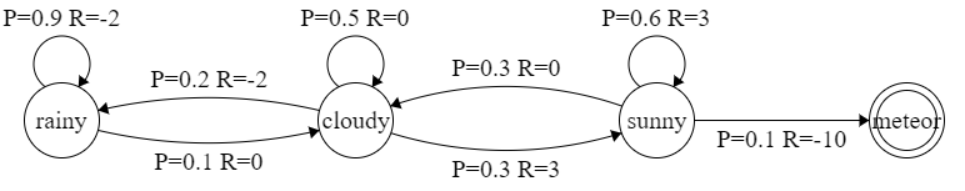

#### Sample 1
rainy --> cloudy --> sunny --> meteor\
$ G_{t} = R_{t+1} + R_{t+2} + R_{t+3} $\
\
$ G_{t} = 0 + 3 + -10$\
\
$ G_{t} = -7$

#### Sample 2
cloudy --> sunny --> cloudy --> rainy --> rainy --> cloudy --> sunny --> sunny --> sunny --> meteor\
$ G_{t} = R_{t+1} + R_{t+2} + R_{t+3} + R_{t+4} + R_{t+5} + R_{t+6} + R_{t+7} + R_{t+8} + R_{t+9} $\
\
$ G_{t} = 3 + 0 + -2 + -2 + 0 + 3 + 3 + 3 + -10$\
\
$ G_{t} = -2$


### D. Value function
In deze opdracht bepaal ik met behulp van de Bellman expectation equation voor elke state wat de value is na 2 iteraties en leg ik uit waarom de discount factor van $\gamma$ = 1 mogelijk problemen oplevert als je er de werkelijkheid mee wilt benaderen.

De Bellman Expectation Equation gaat als volgt:

$V(s) = \mathbb{E}[G_{t} | S_{t} = s]$\
$V(s) = \mathbb{E}[R_{t+1} + \gamma G_{t+1} | S_{t} = s]$\
$V(s) = \mathbb{E}[R_{t+1} + \gamma v (S_{t+1}) | S_{t} = s]$\
$\mathbb{E}$ is de verwachtingswaarde\
$R_{t+1}$ is de reward die je verwacht in de volgende stap\
$\gamma$ is de mate waarin we iets in de toekomst gaan waarderen\
$v (S_{t+1})$ is de value van de state van de volgende stap\
$| S_{t} = s$ betekent gegeven dat we in deze state zijn\
\
$V(s) = \sum_{a} \pi(a|s)\sum_{s',r}p(s',r|s,a)[r+\gamma v_{\pi}(s')]$\
Is de formule die gebruikt wordt voor stochastische situaties zoals die in ons voorbeeld\
\
Nu ga ik bepalen wat de value is voor elke state na 2 iteraties. Hiervoor gelden de volgende dingen:
- De value voor alle states worden geinitialiseerd op 0
- γ = 1

Voor de eerste iteratie zal de formule er met deze gegevens/initialisatiewaardes er zo uit zien:\
$V(s) = \sum_{a} \pi(a|s)\sum_{s',r}p(s',r|s,a)[r+1*0]$\
$V(s) = \sum_{a} \pi(a|s)\sum_{s',r}p(s',r|s,a)[r]$

##### Iteratie 1
$V(rainy) = 0.9 * -2 + 0.1 * 0 = -1.8$\
$V(cloudy) = 0.2 * -2 + 0.5 * 0 + 0.3 * 3= 0.5$\
$V(sunny) = 0.3 * 0 + 0.6 * 3 + 0.1 * -10 = 0.8$\
$V(meteor) = 0 * -2 + 0 * 0 + 0 * 3 + 0 * -10 = 0$\
In alle states behalve de endstate heb ik de berekeningen van de transitie van een state met kans p=0.0 weggelaten, behalve bij de endstate meteor, dit heb ik gedaan om te illustreren waarom de value van de endstate 0 is. In het vervolg schrijf ik meteen 0 op voor de endstate.


Voor de tweede iteratie is de formule weer iets lastiger aangezien we nu niet alleen maar 0 waardes hebben voor de value van de states, de gesimplificeerde formule voor alle volgende iteraties ziet er zo uit:\
$V(s) = \sum_{a} \pi(a|s)\sum_{s',r}p(s',r|s,a)[r+1 * v_{\pi}(s')]$\
$V(s) = \sum_{a} \pi(a|s)\sum_{s',r}p(s',r|s,a)[r+v_{\pi}(s')]$

##### Iteratie 2
$V(rainy) = 0.9 * (-2 + -1.8) + 0.1 * (0 + 0.5) = -3.37$\
$V(cloudy) = 0.2 * (-2 + -1.8) + 0.5 * (0 + 0.5) + 0.3 * (3 + 0.8) \approx 0.63$\
$V(sunny) = 0.3 * (0 + 0.5) + 0.6 * (3 + 0.8) + 0.1 * (-10 + 0) \approx 1.43$\
$V(meteor) = 0$

#### Discount factor
Als γ = 1 betekent dit dat toekomstige beloningen evenveel meewegen als huidige beloningen. Ik zal twee mogelijke problemen benoemen als γ = 1.
1. Het probleem van toekomstige beloningen net zo zwaar laten meewegen is niet realistisch. Een voorbeeld hiervan is het aanbod om 10.000$ nu te krijgen of hetzelfde bedrag over 10 jaar te verkrijgen. Met een γ = 1 wegen deze 2 opties net zo zwaar terwijl je in werkelijkheid liever het geld nu ontvangt zodat je het kan spenderen of zodat je de koopkracht van het geld bewaart (inflatie).
2. Deze waarde kan ook problematisch worden wanneer het waardes in de verre toekomst te sterk laat meewegen wat te sterk beslissingen beinvloed waardoor beloningen van beslissingen op korte termijn ten koste hiervan gaan.

### E. Value iteration
In deze opdracht ga ik handmatig met value iteration bepalen wat de value van elke state in onderstaande MDP is. Ook zal ik bepalen wanneer ik stop met itereren en zal ik deze keuze beargumenteren.

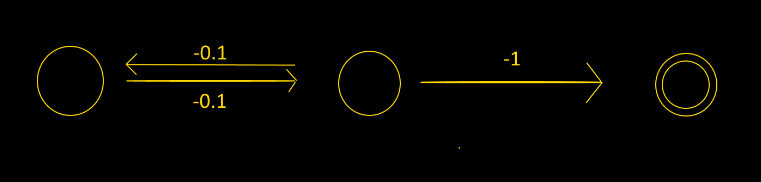

- De waardes bij de pijlen zijn de rewards die je krijgt voor het gaan naar de aangewezen state.
- De value voor alle states wordt geïnitialiseerd op 0.
- Neem een discount factor van γ = 1.
- Om de aankomende tekst te simplificeren zal ik de states van links naar rechts S0, S1 en S2 noemen.

De formule voor value iteration ziet er als volgt uit:\
$V(s) \leftarrow \max_{a} \sum_{s',r}p(s',r|s,a)[r+\gamma V(s')]$\

In deze opgave werken we niet met probability, deze zal ik dus weglaten in de formule.\
$V(s) \leftarrow \max_{a} \sum_{s',r} [r+\gamma V(s')]$\

Ook kunnen we de discountfactor alvast invullen.\
$V(s) \leftarrow \max_{a} \sum_{s',r} [r+1* V(s')]$\
$V(s) \leftarrow \max_{a} \sum_{s',r} [r+V(s')]$

#### Iteratie 1
$V(S0) = -0.1 + 0 = -0.1$\
$V(S1) = \max [(-0.1 + 0), (-1 + 0)] = \max [-0.1, -1] = -0.1$\
$V(S2) = 0$\
Aangegeven bij de dubbele cirkel in de afbeelding is S2, deze dubbele cirkel betekent dat dit de endstate is van het model, zoals uitgelegd in de vorige opgave is deze altijd 0 

#### Iteratie 2
$V(S0) = -0.1 + -0.1 = -0.2$\
$V(S1) = \max [(-0.1 + -0.1), (-1 + 0)] = \max [-0.2, -1] = -0.2$\
$V(S2) = 0$

#### Iteratie 3
$V(S0) = -0.1 + -0.2 = -0.3$\
$V(S1) = \max [(-0.1 + -0.2), (-1 + 0)] = \max [-0.3, -1] = -0.3$\
$V(S2) = 0$

#### Iteratie 4
$V(S0) = -0.1 + -0.3 = -0.4$\
$V(S1) = \max [(-0.1 + -0.3), (-1 + 0)] = \max [-0.4, -1] = -0.4$\
$V(S2) = 0$

#### Iteratie 5
$V(S0) = -0.1 + -0.4 = -0.5$\
$V(S1) = \max [(-0.1 + -0.4), (-1 + 0)] = \max [-0.5, -1] = -0.5$\
$V(S2) = 0$

#### Iteratie 6
$V(S0) = -0.1 + -0.5 = -0.6$\
$V(S1) = \max [(-0.1 + -0.5), (-1 + 0)] = \max [-0.6, -1] = -0.6$\
$V(S2) = 0$

#### Iteratie 7
$V(S0) = -0.1 + -0.6 = -0.7$\
$V(S1) = \max [(-0.1 + -0.6), (-1 + 0)] = \max [-0.7, -1] = -0.7$\
$V(S2) = 0$

#### Iteratie 8
$V(S0) = -0.1 + -0.7 = -0.8$\
$V(S1) = \max [(-0.1 + -0.7), (-1 + 0)] = \max [-0.8, -1] = -0.8$\
$V(S2) = 0$

#### Iteratie 9
$V(S0) = -0.1 + -0.8 = -0.9$\
$V(S1) = \max [(-0.1 + -0.8), (-1 + 0)] = \max [-0.9, -1] = -0.9$\
$V(S2) = 0$

#### Iteratie 10
$V(S0) = -0.1 + -0.9 = -1.0$\
$V(S1) = \max [(-0.1 + -0.9), (-1 + 0)] = \max [-1.0, -1] = -1.0$\
$V(S2) = 0$

#### Iteratie 11
$V(S0) = -0.1 + -1.0 = -1.1$\
$V(S1) = \max [(-0.1 + -1.0), (-1 + 0)] = \max [-1.1, -1] = -1.0$\
$V(S2) = 0$

#### Iteratie 12
$V(S0) = -0.1 + -1.0 = -1.1$\
$V(S1) = \max [(-0.1 + -1.1), (-1 + 0)] = \max [-1.2, -1] = -1.0$\
$V(S2) = 0$

#### Iteratie 13
$V(S0) = -0.1 + -1.0 = -1.1$\
$V(S1) = \max [(-0.1 + -1.1), (-1 + 0)] = \max [-1.2, -1] = -1.0$\
$V(S2) = 0$

Ik heb besloten te stoppen met itereren aangezien ik bij iteratie 12 en 13 precies dezelfde variabelen heb ingevuld en dezelfde uitkomsten heb gekregen, aangezien de iteratie afhankelijk is van de situatie voor de iteratie betekent dit dat vanaf dit punt de waardes die ik in zal vullen niet meer zullen veranderen en geen andere uitkomsten zullen opleveren. Vandaar dat ik gestopt ben met itereren. Om de uitkomsten samen te vatten heb ik deze tabel gemaakt:\
|Iteratie|S0  |S1  |S2 |
|:------:|:--:|:--:|:-:|
|0       |0   |0   |0  | 
|1       |-0.1|-0.1|0  | 
|2       |-0.2|-0.2|0  | 
|3       |-0.3|-0.3|0  | 
|4       |-0.4|-0.4|0  | 
|5       |-0.5|-0.5|0  | 
|6       |-0.6|-0.6|0  | 
|7       |-0.7|-0.7|0  | 
|8       |-0.8|-0.8|0  | 
|9       |-0.9|-0.9|0  | 
|10      |-1  |-1  |0  | 
|11      |-1.1|-1  |0  | 
|12      |-1.1|-1  |0  | 

In de tabel kunnen we een duidelijk patroon zien totdat we de 11de iteratie bereiken, dit komt omdat vanaf dit punt in State S1 het voordeliger is om naar rechts te gaan ipv naar links zoals in de eerste 9 iteraties (iteratie 10 was een gelijkspel). Na dit punt blijven de values hetzelfde voor elke volgende iteratie